# 2 Data Preparation

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(361, 8, 8)
(216, 8, 8) (145, 8, 8)
[[ 0.  0.  0.  3.  9. 16. 16.  2.]
 [ 0.  0.  4. 16. 13. 11. 16.  1.]
 [ 0.  0.  3.  5.  0.  6. 13.  0.]
 [ 0.  0.  0.  2.  7. 14.  9.  0.]
 [ 0.  0.  4. 16. 16. 15.  3.  0.]
 [ 0.  0.  9.  8. 11. 12.  0.  0.]
 [ 0.  0.  0.  0. 12.  4.  0.  0.]
 [ 0.  0.  0.  2. 15.  1.  0.  0.]]
[ 0.  0.  0.  3.  9. 16. 16.  2.]


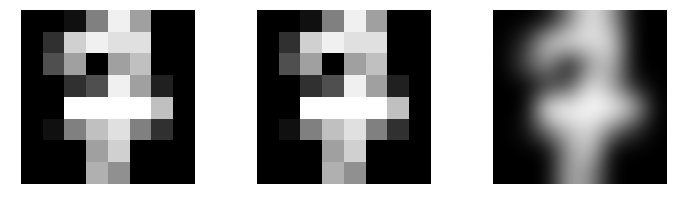

In [5]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import model_selection


#import data
digits = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_name = digits["target_names"]


#filter data
condition = np.logical_or(target == 1, target == 7)

labels = np.extract(condition,target) #target: 1 or 7
features = images[np.where(condition)] #images showing 1 or 7

print(features.shape)



#training and test set
X_all = features
y_all = labels
X_train, X_test, y_train , y_test = model_selection.train_test_split(
                                    X_all,
                                    y_all,
                                    test_size = 0.4,
                                    random_state = 0)

print(X_train.shape, X_test.shape)
print(X_train[0,:,:])

print(X_train[0,0,:])

img = features[3,:,:]
assert 2 == len( img . shape )

fig = plt.figure(figsize = (10,3))
plt.gray()
plt.subplot('131'); plt.axis('off')
plt.imshow(img, interpolation = "nearest")
plt.subplot('132'); plt.axis('off')
plt.imshow(img, interpolation = "nearest")
plt.subplot('133'); plt.axis('off')
plt.imshow(img, interpolation = "bicubic")
fig.tight_layout(); plt.show()

<span style =" color : green ;font - weight : bold ">Comment </span >

We did exactly the same - the sample solution is rapped up nicely in a function to create new training and test set.

## 2.1 Dimension Reduction

The feature dimensions I choose are:

1) Ratio white/black over number of non black cells

2) How many of the upper row pixels are non black?

In [28]:
def reduce_dim(x):
    
    feature_one = np.divide(np.sum(x,axis=(1,2)),np.count_nonzero(x,axis=(1,2)))
    feature_two = np.add(np.count_nonzero(x[:,0,:],axis=1),np.count_nonzero(x[:,4,:],axis=1))

    
    return np.array([feature_one, feature_two]).T

#test example
reduce_x = reduce_dim(X_train)          
print(reduce_x.shape)

(216, 2)


<span style =" color : green ;font - weight : bold ">Comment </span >

We write as in the sample solution a function that reduces our 64 input feature dimensions to two, but we chose of course different features.

## 2.2 Scatterplot

(182, 8, 8) (179, 8, 8)


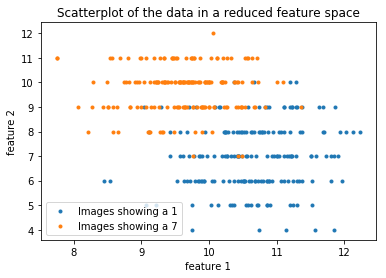

In [8]:
X_1 = X_all[np.where(y_all ==1)]
X_7 = X_all[np.where(y_all ==7)]

print(X_1.shape, X_7.shape)

#position in featurespace
x,y = reduce_dim(X_1).T
a,b = reduce_dim(X_7).T

plt.scatter(x,y, label='Images showing a 1', marker='.')
plt.scatter(a,b, label='Images showing a 7', marker='.')
plt.title('Scatterplot of the data in a reduced feature space')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


As can be seen in the scatterplot above, the areas defined by the different labels overlap in the feature space, but a tendency is visible.

<span style =" color : green ;font - weight : bold ">Comment </span >

We did exactly the same - the sample solution is rapped up nicely in a function in order to create a plot in an easier fashion. The overview is better mainainted, due to the introduced functions as well as due to the comments.

# 3 Nearest Mean
## 3.1 Implementation of the nearest mean classifier

In [9]:
def nearest_mean(training_features, training_labels, test_features):
    
    #split training data according to label
    im_1 = training_features[np.where(training_labels==1)]
    im_7 = training_features[np.where(training_labels==7)]
    
    #calc mean position of training data in feature space
    mean_1 = np.mean(im_1, axis=0)
    mean_7 = np.mean(im_7, axis=0)
    print(mean_1, mean_7)
    
    #squared distance of the test_features to means of training data
    dist_1 = np.sum(np.square(np.subtract(mean_1,test_features)), axis=1)
    dist_7 = np.sum(np.square(np.subtract(mean_7,test_features)), axis=1)
    
    #prediction made on squared distance
    predicted_labels = np.ones(len(test_features))
    predicted_labels[np.where(dist_1 > dist_7)] = 7
    
    return predicted_labels

predicted_labels = nearest_mean(reduce_dim(X_train), y_train, reduce_dim(X_test))

print(predicted_labels[:5])

[10.60822946  6.93495935] [9.59778221 9.64516129]
[7. 7. 7. 1. 7.]


<span style =" color : green ;font - weight : bold ">Comment </span >

The sample solution again does the same, but what is nice about theirs is that in order to reuse the distance calculus they export it in another function 'distance from mean'.

The sample solution uses more lists, whereas we use more np.arrays.

They also return the calculated mean points, which comes in handy, because we recalculated them later.

What is nice about their solution is that they test the accuracy with the test data, we did not - but it was also not asked to do so.

## 3.2 Visualize the decision regions

This is a bit more difficult in our case, because we chose one of the features to be an integer within $f_2\in[0,16]$
We choose our grid to have the resolution 200x20

[10.60822946  6.93495935] [9.59778221 9.64516129]


TypeError: Incompatible X, Y inputs to pcolor; see help(pcolor)

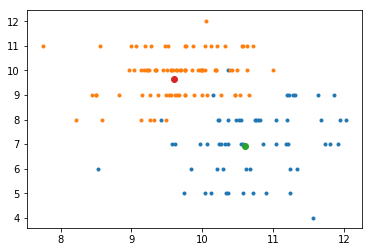

In [26]:
#the test data in feature space
X_test_1 = X_test[np.where(y_test ==1)]
X_test_7 = X_test[np.where(y_test ==7)]
x_pos_t1, y_pos_t1 = reduce_dim(X_test_1).T
x_pos_t7, y_pos_t7 = reduce_dim(X_test_7).T
plt.scatter(x_pos_t1, y_pos_t1, label='Test-images showing a 1', marker='.')
plt.scatter(x_pos_t7, y_pos_t7, label='Test-images showing a 7', marker='.')

#the mean in feature_space
training_features = reduce_dim(X_train)
training_labels = y_train
    #split training data according to label
im_1 = training_features[np.where(training_labels==1)]
im_7 = training_features[np.where(training_labels==7)]
    #calc mean position of training data in feature space
mean_1 = np.mean(im_1, axis=0)
mean_7 = np.mean(im_7, axis=0)
x_pos_m1, y_pos_m1 = mean_1
x_pos_m7, y_pos_m7 = mean_7
plt.scatter(x_pos_m1, y_pos_m1, marker='o')
plt.scatter(x_pos_m7, y_pos_m7, marker='o')

#the decision regions
    #grid
F_1 = np.linspace(7.5,12.5,200)
F_2 = np.linspace(3.5,12.5,200)
f1,f2 = np.meshgrid(F_1, F_2)
    #position training data
X_train_1 = X_train[np.where(y_train ==1)]
X_train_7 = X_train[np.where(y_train ==7)]
x_pos_tr1, y_pos_tr1 = reduce_dim(X_train_1).T
x_pos_tr7, y_pos_tr7 = reduce_dim(X_train_7).T
grid = np.reshape(np.array([f1,f2]),(2,40000))
decision_regions = nearest_mean(reduce_dim(X_train), y_train, grid.T)

plt.pcolor(grid.T,f1,f2)

plt.title('Scatterplot of the data in a reduced feature space')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

<span style =" color : green ;font - weight : bold ">Comment </span >

Ok, here our solution is wrong and differs a lot from the sample one. What is still valid, is the scatterplot as asked in 2.2 but here only the test data are shown. The means are also correct, but we could have used former results in order to minimize computational costs.

What I did not understand was how we should color the decision regions and this is why I tried to plot the impossible (I thought of something more like a contour plot). What we could have done would be: Make a grid, calculate for each grid point in feature space what label would be predicted. Colour predicted ones with another colour then sevens. Done.

# 4 QDA
## 4.1 Implement QDA Training

In [94]:
def covariance(mean, x_vec):
    dist = np.subtract(x_vec,np.ones(x_vec.shape)*mean)
    cov = np.divide(np.matmul(dist.T,dist), len(x_vec))
    return cov

def fit_qda(training_features, training_label_bin):
    
    #label=0 -> digit=1
    #label=1 -> digit=7
        
    #split training data according to label
    im_1 = training_features[np.where(training_label_bin==1)]
    im_7 = training_features[np.where(training_label_bin==7)]
    #calc mean position of training data in feature space
    mean_1 = np.mean(im_1, axis=0)
    mean_7 = np.mean(im_7, axis=0)
    
    mu = np.array([mean_1, mean_7])
    
    #calc cov according to script
    cov_1 = covariance(mean_1,im_1)
    cov_7 = covariance(mean_7,im_7)
    covmat = np.array([cov_1,cov_7])
    
    #
    p_1 = len(im_1)/(len(im_1)+len(im_7))
    p_7 = 1 - p_1
    p = np.array([p_1,p_7])
    
    return mu, covmat, p

a = fit_qda(reduce_dim(X_train), y_train)
print(a)

(array([[10.60822946,  6.93495935],
       [ 9.59778221,  9.64516129]]), array([[[ 0.50245161,  0.04286423],
        [ 0.04286423,  1.88194858]],

       [[ 0.45101729, -0.10089443],
        [-0.10089443,  0.960111  ]]]), array([0.56944444, 0.43055556]))


<span style =" color : green ;font - weight : bold ">Comment </span >

Our fit_qda function returns what was required.The sample solution works more generally by iterating over different labels and calculating all means and cov for those. Also, they use the np.cov function which does the same as our selfwritten one, but is probabely faster.

# 4.2 and 5

<span style =" color : green ;font - weight : bold ">Comment </span >

Further exercises were not handed in by us last week. But the sample solutions are nice!